In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TrainingData_6000.csv') #this reads the dataset 
X = dataset.iloc[:, 0:2] # Separting X and y so that we can train and test the model
y = dataset.iloc[:, 2]
dataset.head(6000)

,DepthCut,SpindleSpd,Stable/Unstable
0,0.021,1800,1
1,0.022,1800,1
2,0.023,1800,1
3,0.024,1800,1
4,0.025,1800,1
...,...,...,...
5995,0.070,4300,0
5996,0.071,4300,0
5997,0.072,4300,0
5998,0.073,4300,0


In [ ]:
from sklearn.model_selection import train_test_split                                              #using sklearn module to split the current dataset in the ratio 75-25 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)     # into train and test .

from sklearn.preprocessing import StandardScaler                                                  #In sklearn.preprocessing using StandardScaler to feature scale the X dataset
scaler = StandardScaler()                                                                         # As X(:,0) and X(:,1) are of different order
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

classifier = Sequential() #ANN model building
# Adding the input layer and the first hidden layer
classifier.add(Dense (192, kernel_initializer = 'he_uniform',activation='relu',input_dim = 2))
classifier.add(Dense(192, kernel_initializer=  'he_uniform',activation='relu')) #hidden_Layer_2
classifier.add(Dense(192, kernel_initializer=  'he_uniform',activation='relu')) # hidden_Layer_3
classifier.add(Dense(224, kernel_initializer=  'he_uniform',activation='relu')) #hidden_Layer_4


classifier.add(Dense (1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid')) #outputLayer
#compiling the model
classifier.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2), loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 16, epochs = 100)


Epoch 1/100
198/198 [==============================] - 2s 5ms/step - loss: 0.6262 - accuracy: 0.7026 - val_loss: 0.5364 - val_accuracy: 0.7046
Epoch 2/100
198/198 [==============================] - 1s 5ms/step - loss: 0.5005 - accuracy: 0.7137 - val_loss: 0.4988 - val_accuracy: 0.7162
Epoch 3/100
198/198 [==============================] - 1s 4ms/step - loss: 0.4577 - accuracy: 0.7441 - val_loss: 0.4379 - val_accuracy: 0.7613
Epoch 4/100
198/198 [==============================] - 1s 4ms/step - loss: 0.4080 - accuracy: 0.7698 - val_loss: 0.4710 - val_accuracy: 0.7252
Epoch 5/100
198/198 [==============================] - 1s 4ms/step - loss: 0.4003 - accuracy: 0.7689 - val_loss: 0.3995 - val_accuracy: 0.7632
Epoch 6/100
198/198 [==============================] - 1s 4ms/step - loss: 0.3517 - accuracy: 0.7968 - val_loss: 0.3489 - val_accuracy: 0.7941
Epoch 7/100
198/198 [==============================] - 1s 4ms/step - loss: 0.3592 - accuracy: 0.7974 - val_loss: 0.2738 - val_accuracy: 0.8333

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


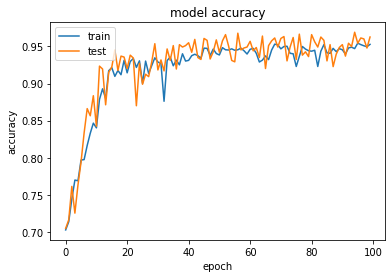

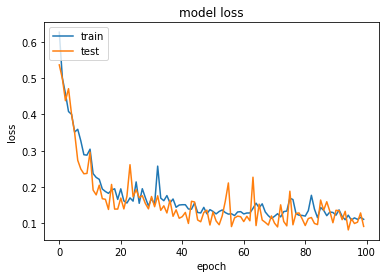

[[534  33]
 [ 23 980]]
Accuracy: 96.43312101910828 %


In [ ]:
print(model_history.history.keys())
                                                                      #summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print('Accuracy:',score*100,"%")